# Explorando a planilha Crustaceas_MN

## Imports

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import datetime as dt
import math as mt
import array as arr

alt.renderers.enable('notebook')   # renderizador do altair para notebook

RendererRegistry.enable('notebook')

## Importando a base de dados

In [2]:
# file_name = './data/db.csv'
# crustaceas = pd.read_csv(file_name, sep=',', encoding='utf-8', index_col=False, low_memory=False)

# importando dados para ver se o código funciona com a minha base
excel_name = './Planilha geral Atualizda FINAL com correções.xlsx'
excel_file = pd.ExcelFile(excel_name)
crustaceas = excel_file.parse(excel_file.sheet_names[0], sep=';', encoding='utf-8-sig') 

## Preparando dados para o gráfico...

In [3]:
# data de catalogação
Table_Date = crustaceas['Cataloged Date']
print(Table_Date.size)

# passando datas para o formato datetime
d = []
for row in Table_Date:
    if not str(row).find('/')==-1:
        dates_values = str(row).split("/")
        year = int(dates_values[0])
        month = int(dates_values[1])
        if (month>1) and (month<12):
            #store the year and month in a datetime datatype for later sorting
            dateRecord = dt.datetime(year,month,1)
#         else:
#             #if the month is not valid, then use 1/1/1 as the date
#             dateRecord = dt.datetime(1,1,1)
#     else:
#         #if the date is nan, then use 1/1/1 as the date
#         dateRecord = dt.datetime(1,1,1)         
    d.append({'Date': dateRecord, 'year':year})
NewTable_Date = pd.DataFrame(d)
# NewTable_Date.dtypes

# amount = crustaceas['Cataloged Date'].value_counts(sort=False)
amount = NewTable_Date['year'].value_counts(sort=True)
ordered_amount = amount.sort_index()
F_amount=pd.DataFrame({'x': np.arange(ordered_amount.size), 'y': ordered_amount})

28689


In [22]:
# contando o número de ocorrências por ano
teste = Table_Date.apply(lambda x:str(x).split('/')[0]).value_counts().sort_index().reset_index()

In [25]:
teste.rename(columns={'index':'year', 'Cataloged Date':'n_ocurrences'}, inplace=True)

In [33]:
teste['n_ocurrences'] = teste['n_ocurrences'].astype(int)

In [46]:
# removendo linha com year = nan
teste = teste.drop(87, axis=0)

## Gráfico (main)

In [51]:
# min e max para eixo X (year)
min_x = teste['year'].min()
max_x = teste['year'].max()

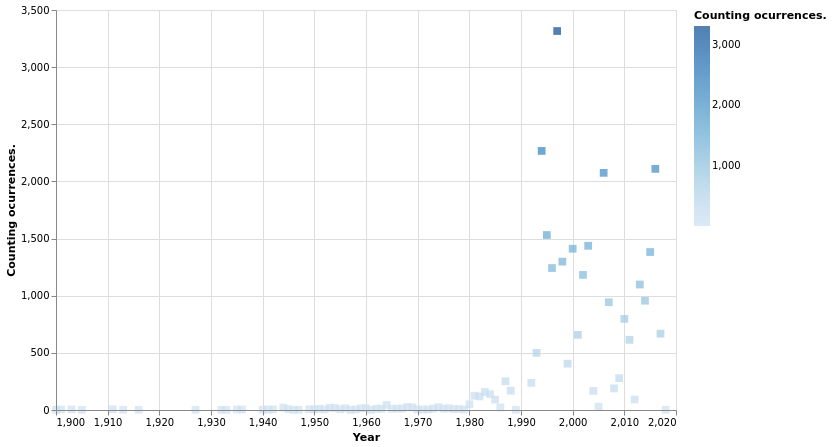

In [60]:
alt.Chart(teste,width=620,height=400).mark_square(size=60).encode(
    x= alt.X('year:Q', title='Year', scale=alt.Scale(domain=[min_x, max_x])),
    y= alt.Y('n_ocurrences', title='Counting ocurrences.'),
    color=alt.Color('n_ocurrences', title='Counting ocurrences.', scale=alt.Scale(scheme='blues'))
)

28689


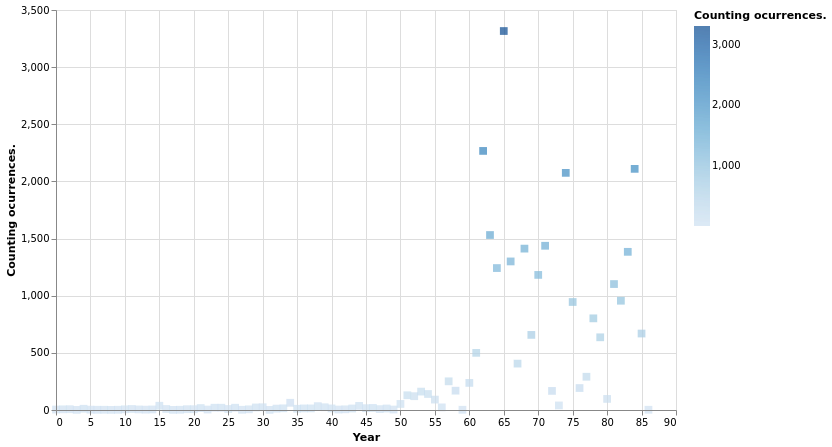

In [8]:
alt.Chart(F_amount,width=620,height=400).mark_square(size=60).encode(
    x= alt.X('x', title='Year'),
    y= alt.Y('y', title='Counting ocurrences.'),
    color=alt.Color('y', title='Counting ocurrences.', scale=alt.Scale(scheme='blues'))
)

**Fim.**